In [1]:
# imports libraries
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math
import sklearn.decomposition as dcmp
import pyaudio
import csv
import IPython
import pywt

%matplotlib inline 

# Grabs the preprocessing and automatic_sync files
sys.path.append(os.path.join(os.pardir,'pythonCode'))
import preprocessing as pp
import automatic_sync as autoS
import detection as det

In [2]:
# Determines which cameras will be selected (['Bents'],['Camera Location'],['Motion #'])
filt = (None,None,['18']) # Selects the bent 1 camera used during motion 18

# now reads in the datafile from the raw data folder
rawDataPath = os.path.join(os.pardir,'rawData')
files = glob.glob(os.path.join(rawDataPath, '*.wav'))
names = []
        
for name in files:
    fileName = os.path.basename(name).split(".")[0]
    names.append(fileName)

# Applies filter to camera names and returns only selected subset names
audioFiles = pp.getKeys(names,filt);
# Reads the .wav files from the list generted by getKeys
(names,rawDataset) = pp.readWAV(rawDataPath,audioFiles);

Opening GP_B1_NL_18 ...
Opening GP_B1_NU_18 ...
Opening GP_B1_SL_18 ...
Opening GP_B1_SU_18 ...
Opening GP_B2_SL_18 ...
Opening GP_B2_SU_18 ...
Opening GP_B3_NL_18 ...
Opening GP_B3_NU_18 ...
Opening GP_B3_SL_18 ...
Opening GP_B3_SU_18 ...


In [37]:
final_offsets, syncData = autoS.sync_dataset(rawDataset,'GP_B1_NL_18',names,mask=[0,1])
print(final_offsets)

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
{'GP_B1_SL_18': 85041, 'GP_B3_SL_18': 81942, 'GP_B3_NL_18': 80861, 'GP_B1_NL_18': 85198, 'GP_B3_SU_18': 82591, 'GP_B1_NU_18': 85082, 'GP_B3_NU_18': 81723, 'GP_B2_SU_18': 0, 'GP_B1_SU_18': 84693, 'GP_B2_SL_18': 3018}


C:\Users\Travis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7027: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


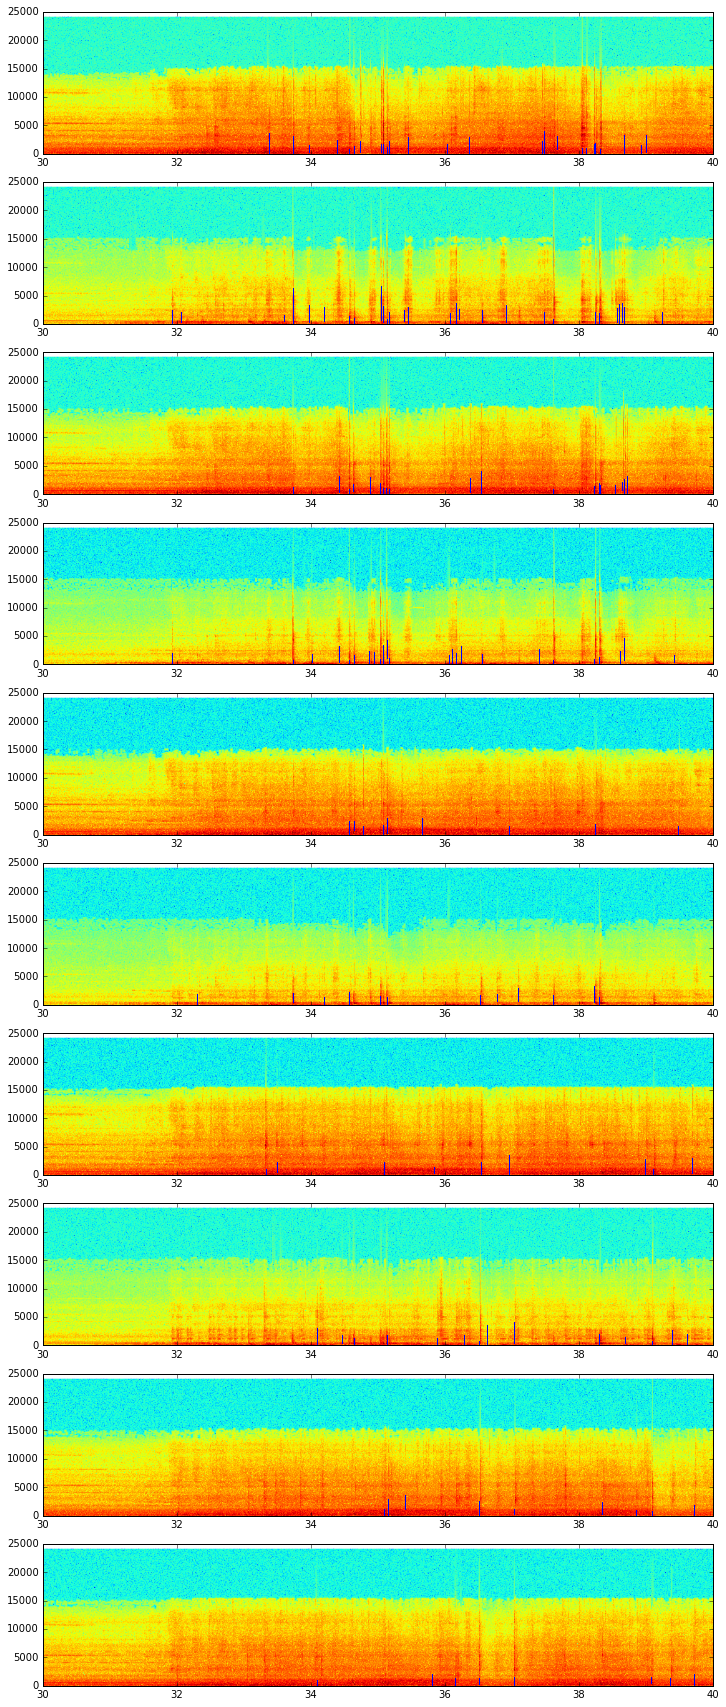

In [38]:
index = 1
totalfrac = {}
fig1 = plt.figure(figsize = (12,30))

for name in names:
    plt.subplot(len(names),1,index)
    fractures = det.spectrogram_ridges(syncData[name][:,0],min_length = 130)
    plt.xlim(30,40)
    totalfrac[name] = fractures
    index += 1

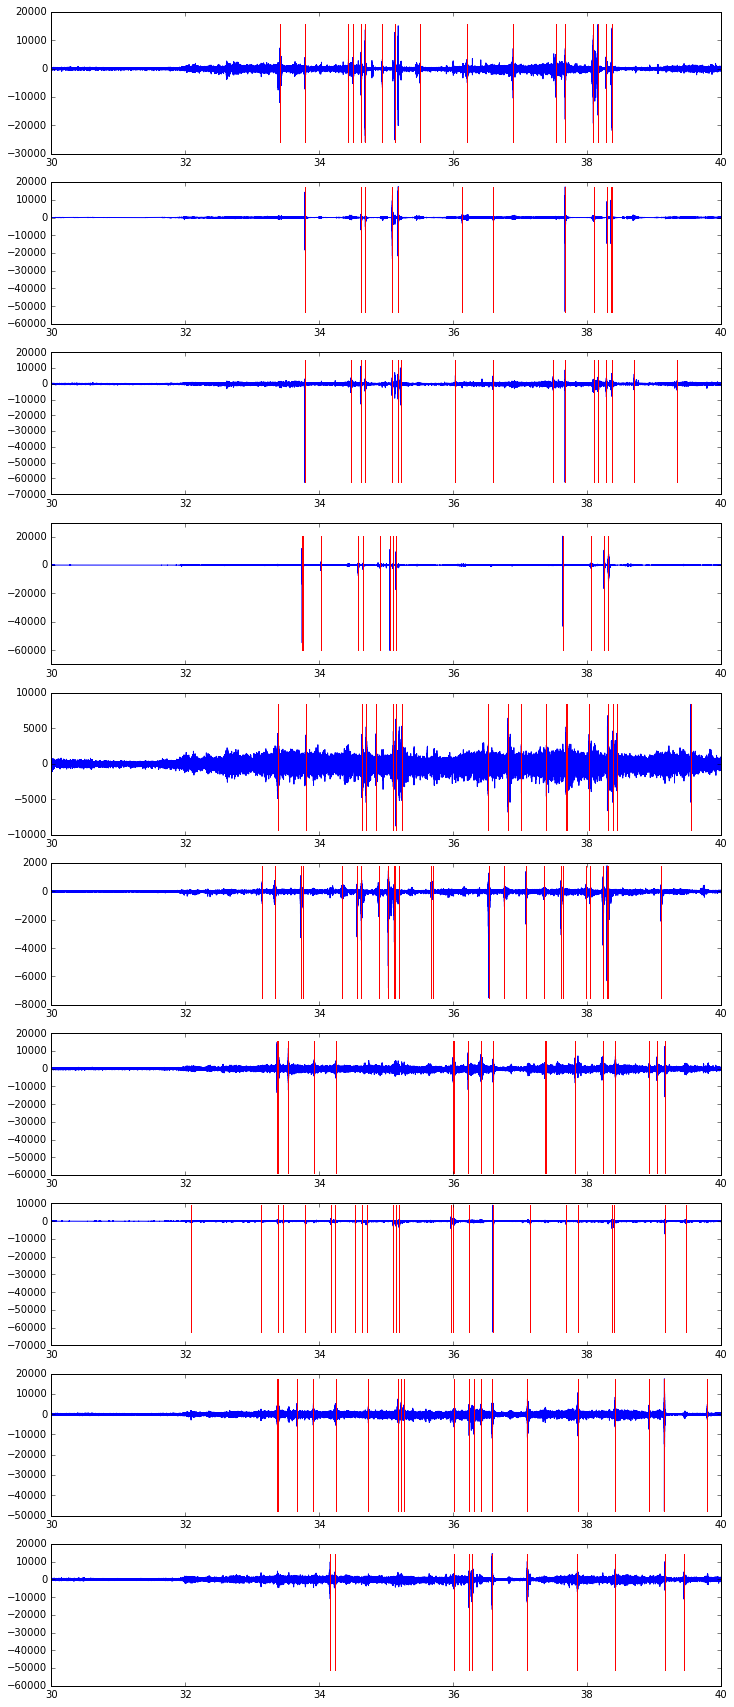

In [6]:
index = 1
totalfrac2 = {}
fig1 = plt.figure(figsize = (12,30))

for name in names:
    plt.subplot(len(names),1,index)
    fractures = det.med_filt(syncData[name][:,0],kernel = 7,thresh = 16)
    plt.xlim(30,40)
    totalfrac2[name] = fractures
    index += 1

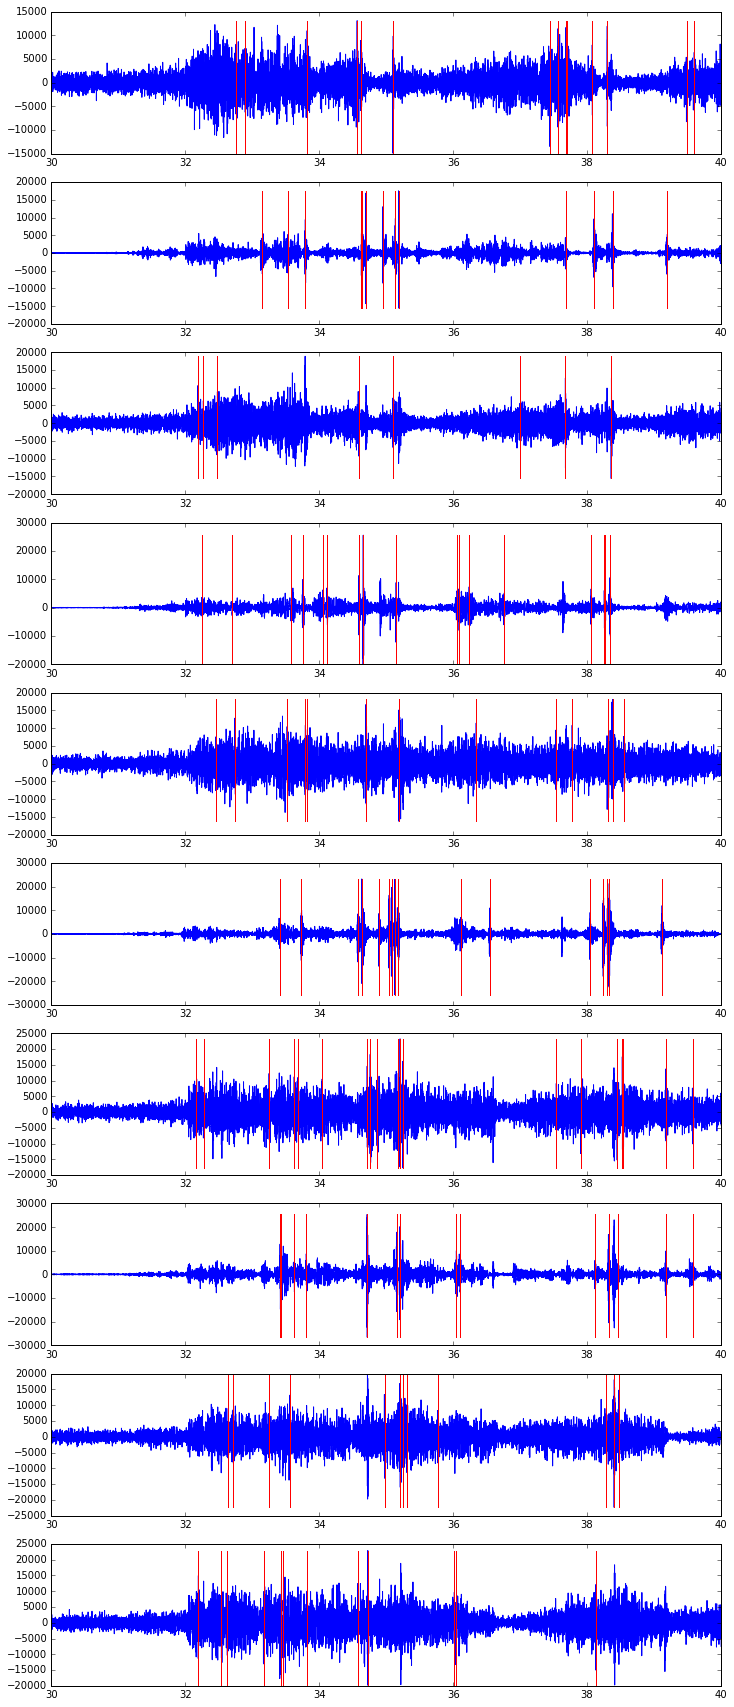

In [7]:
index = 1
totalfrac3 = {}
fig1 = plt.figure(figsize = (12,30))

for name in names:
    plt.subplot(len(names),1,index)
    fractures = det.cwt_ridges(syncData[name][:,0])
    plt.xlim(30,40)
    totalfrac3[name] = fractures
    index += 1

In [8]:
csvPath = os.path.join(os.pardir,'rawData')
fileName = glob.glob(os.path.join(csvPath,'GP_B1_NL_18.csv')); 

fractInd = list(csv.reader(open(fileName[0], 'rt'), delimiter=','))
fractInd = np.array([float(i[0]) for i in fractInd]) # in counts

fractIM = 1/48000*(-final_offsets['GP_B1_NL_18'] + fractInd)
print(fractIM)

[ 32.42708333  32.49358333  33.0434375   33.359125    33.41720833
  33.59320833  33.64508333  33.77935417  33.83475     34.649125    34.7144375
  35.09402083  35.14564583  37.30927083  37.52816667  37.66704167
  37.70439583  37.76483333  38.07970833  38.1285625   38.18139583
  38.28785417  38.35210417  38.39391667]


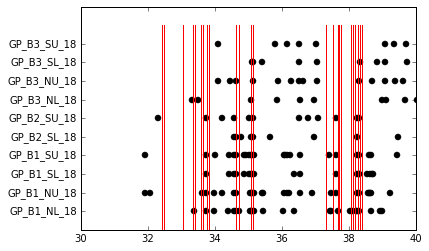

In [39]:
# for spectrogram ridgeline detection method
index = 1
for name in names:
    plt.plot(totalfrac[name], index*np.ones_like(totalfrac[name]),'ko')
    index += 1
plt.plot([fractIM,fractIM],[0,len(names)+1],'r')
plt.yticks(np.arange(1,len(names)+1), names)
plt.xlim(30,40)
plt.show()

(1, 5)

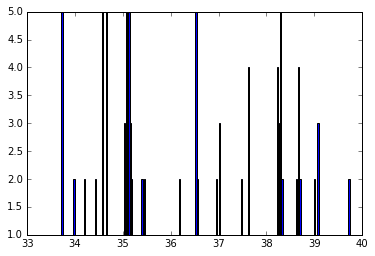

In [40]:
# for spectrogram ridgeline detection method
index = 1
this_array = []

for name in names:
    this_array = np.hstack((this_array,totalfrac[name]))
    
    
bins = np.linspace(0, 60, 2400)    
n = plt.hist(this_array, bins)
plt.xlim(33,40)
plt.ylim(1,5)

(array([ 0.,  0.,  0., ...,  0.,  0.,  0.]),
 array([  0.00000000e+00,   2.50104210e-02,   5.00208420e-02, ...,
          5.99499792e+01,   5.99749896e+01,   6.00000000e+01]),
 <a list of 2399 Patch objects>)

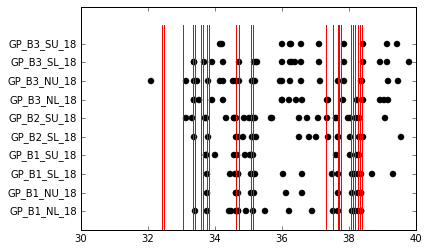

In [10]:
# for the median filter thresholding method
index = 1
for name in names:
    plt.plot(totalfrac2[name], index*np.ones_like(totalfrac2[name]),'ko')
    index += 1
plt.plot([fractIM,fractIM],[0,len(names)+1],'r')
plt.yticks(np.arange(1,len(names)+1), names)
plt.xlim(30,40)
plt.show()

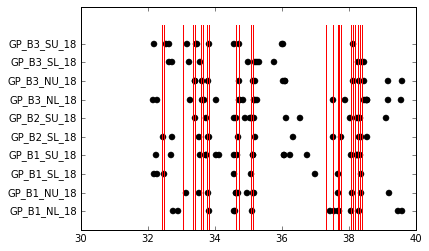

In [11]:
# for the cwt ridgeline detection method
index = 1
for name in names:
    plt.plot(totalfrac3[name], index*np.ones_like(totalfrac3[name]),'ko')
    index += 1
plt.plot([fractIM,fractIM],[0,len(names)+1],'r')
plt.yticks(np.arange(1,len(names)+1), names)
plt.xlim(30,40)
plt.show()